<h1>Машинне навчання</h1>
<p>Ю.С. Процик. Курс лекцій</p>
<div align="right"><em>Cформовано на основі <a href="https://mlcourse.ai">відкритого курсу</a> Юрія Кашницького</em></div>

# <center> Тема 6. Ансамблі і випадковий ліс</center>
## <center> Частина 1. Беггінг і випадковий ліс</center>

## План

1. [Ансамблі](#1.-Ансамблі)
2. [Бутстреп](#2.-Бутстреп)
3. [Беггінг](#3.-Беггінг)
4. [Out-of-bag error](#4.-Out-of-bag-error)
5. [Випадковий ліс](#5.-Випадковий-ліс)

З минулих лекцій ви вже дізналися про різні алгоритми класифікації, а також навчилися правильно перевіряти і оцінювати якість моделі. Але що робити, якщо ви вже знайшли кращу модель і підвищити точність моделі більше не можете? У такому випадку потрібно застосувати більш просунуті техніки машинного навчання, які можна об'єднати словом «ансамблі». *Ансамбль* — це деяка сукупність, частини якої утворюють єдине ціле. З повсякденного життя ви знаєте музичні ансамблі, де об'єднані декілька музичних інструментів, архітектурні ансамблі з різними будівлями і т.д.

## 1. Ансамблі

Хорошим прикладом ансамблів вважається теорема Кондорсе «про журі присяжних» (1784). Якщо кожен член журі присяжних має незалежну думку, і якщо ймовірність правильного рішення члена журі більша за 0.5, то тоді ймовірність правильного рішення присяжних в цілому зростає зі збільшенням кількості членів журі і прямує до одиниці. Якщо ж ймовірність бути правим у кожного з членів журі менша за 0.5, то ймовірність прийняття правильного рішення присяжними в цілому монотонно зменшується і прямує до нуля зі збільшенням кількості присяжних.
- $\large N $ — кількість присяжних
- $\large p $ — ймовірність правильного рішення присяжного
- $\large \mu $ — ймовірність правильного рішення всього журі
- $\large m $ — мінімальна більшість членів журі, $\large m = floor(N/2) + 1 $
- $\large C_N^i$ — кількість комбінацій з $N$ по $i$ 
$$ \large \mu = \sum_{i=m}^{N}C_N^ip^i(1-p)^{N-i} $$

Якщо $\large p > 0.5 $, то $\large \mu > p $. Якщо $\large N \rightarrow \infty $, то $\large \mu \rightarrow 1 $.

Давайте розглянемо ще один приклад ансамблів — "Мудрість натовпу". Френсіс Гальтон в 1906 році відвідав ринок, де проводилася якась лотерея для селян. Їх зібралося близько 800 чоловік і вони намагалися вгадати вагу бика, який стояв перед ними. Його вага становила 1198 фунтів. Жоден селянин не вгадав точну вагу бика, але якщо порахувати середнє від їх прогнозів, то отримаємо 1197 фунтів. Подібну ідею зменшення помилки застосували і в машинному навчанні.

## 2. Бутстреп

*Bagging* (від Bootstrap aggregation) — це один з перших і найпростіших видів ансамблів. Він був придуманий [Лео Брейманом](https://ru.wikipedia.org/wiki/Брейман,_Лео) в 1994 році. Беггінг базується на статистичному методі бутстрепа, який дозволяє оцінювати найрізноманітніші статистики складних моделей.

Метод бутстрепа полягає в наступному. Нехай є вибірка $\large X$ розміру $\large N$. Рівномірно візьмемо з вибірки $\large N$ об'єктів з поверненням. Це означає, що ми будемо $\large N$ раз вибирати довільний об'єкт вибірки (вважаємо, що кожен об'єкт «дістається» з однаковою ймовірністю $\large \frac{1}{N}$), причому кожен раз ми вибираємо з усіх вихідних $\large N$ об'єктів. Можна уявити собі мішок, з якого дістають кульки: обрана на якомусь етапі кулька повертається назад в мішок, і наступний вибір знову робиться рівноймовірно з тієї ж кількості кульок. Відзначимо, що через повернення серед них виявляться повтори. Позначимо нову вибірку через $\large X_1$. Повторюючи процедуру $\large M$ разів, сгенеруємо $\large M$ підвибірок $\large X_1, \dots, X_M$. Тепер ми маємо досить велику кількість вибірок і можемо оцінювати різні статистики вихідного розподілу.

![Image](../img/bootstrap.jpg)

## 3. Беггінг


Тепер ви маєте уявлення про бустреп, і ми можемо перейти безпосередньо до *беггінгу*. Нехай є навчальна вибірка $\large X$. За допомогою бутстрепа згенеруємо з неї вибірки $\large X_1, \dots, X_M$. Тепер на кожній вибірці навчимо свій класифікатор $\large a_i(x)$. Фінальний класифікатор буде усереднювати відповіді всіх цих алгоритмів (у випадку класифікації це відповідає голосуванню): $\large a(x) = \displaystyle\frac{1}{M}\sum\limits_{i = 1}^M a_i(x)$. 

Цю схему можна представити наступним чином:

<img src="../img/bagging.png" alt="image"/>

Беггінг дозволяє знизити дисперсію (variance) класифікатора, зменшуючи величину, на скільки помилка буде відрізнятися, якщо навчати модель на різних наборах даних, або іншими словами, запобігає перенавчанню. Ефективність беггінга досягається завдяки тому, що базові алгоритми, що навчалися на різних підвибірках, виходять досить різними, і їхні помилки взаємно компенсуються при голосуванні, а також за рахунок того, що об'єкти-викиди можуть не потрапляти до деяких навчальних підвибірок.

У бібліотеці `scikit-learn` є реалізація `BaggingRegressor` і `BaggingClassifier`, яка дозволяє використовувати більшість інших алгоритмів "всередині". 

Беггінг ефективний на малих вибірках, коли виключення навіть малої частини навчальних об'єктів призводить до побудови суттєво різних базових класифікаторів. У разі великих вибірок зазвичай генерують підвибірки істотно меншої довжини.

## 4. Out-of-bag error

Забігаючи вперед, відзначимо, що при використанні випадкових лісів немає необхідності в крос-валідації або в окремому тестовому наборі, щоб отримати незміщену оцінку помилки набору тестів. Внутрішня оцінка під час роботи отримується таким чином:

Кожне дерево будується з використанням різних зразків бутстрепа з вихідних даних. Приблизно 37% прикладів залишаються поза вибіркою бутстрепа і не використовується при побудові k-го дерева.

Це можна легко довести: нехай у вибірці $\large \ell$ об'єктів. На кожному кроці всі об'єкти потрапляють в підвибірку з поверненням рівноймовірно, тобто окремий об'єкт — з ймовірністю $\large\frac{1}{\ell}.$ Ймовірність того, що об'єкт НЕ потрапить в підвибірку (тобто його не взяли $\large \ell$ раз): $\large (1 - \frac{1}{\ell})^\ell$. При $\large \ell \rightarrow +\infty$ отримуємо одну з "чудових" границь $\large \frac{1}{e}$. Тоді ймовірність попадання конкретного об'єкта в підвибірку $\large \approx  1 - \frac{1}{e} \approx 0.63$.

Давайте розглянемо, як це працює на практиці:

![Image](../img/oob.png)

На рисунку зображена оцінка oob-помилки. Верхній рисунок — це наша вихідна вибірка, її ми ділимо на навчальну (зліва) і тестову (праворуч). На рисунку зліва у нас є сітка з квадратиків, яка ідеально розбиває нашу вибірку. Тепер потрібно оцінити частку вірних відповідей на нашій тестовій вибірці. На рисунку видно, що наш класифікатор помилився в 4 спостереженнях, які ми не використали для навчання. Значить, частка вірних відповідей нашого класифікатора: $\large \frac{11}{15}*100\% = 73.33\%$

Виходить, що кожен базовий алгоритм навчається на ~ 63% вихідних об'єктів. Значить, на ~ 37%, що залишилися, його можна відразу перевіряти. Out-of-Bag оцінка — це усереднена оцінка базових алгоритмів на тих ~ 37% даних, на яких вони не навчалися.

## 5. Випадковий ліс

Лео Брейман знайшов застосування бутстрепу не тільки в статистиці, а й в машинному навчанні. Він разом з Адель Катлер вдосконалив алгоритм випадкового лісу, який був запропонований [Хо](http://ect.bell-labs.com/who/tkh/publications/papers/odt.pdf), додавши до початкового варіанту побудову некорельованих дерев на основі [CART](https://en.wikipedia.org/wiki/Predictive_analytics#Classification_and_regression_trees_.28CART.29), в поєднанні з [методом випадкових підпросторів](https://en.wikipedia.org/wiki/Random_subspace_method) і беггінга.

Дерева рішень є хорошим сімейством базових класифікаторів для беггінга, оскільки вони досить складні і можуть досягати нульової помилки на будь-якій вибірці. Метод випадкових підпросторів дозволяє знизити корельованість між деревами і уникнути перенавчання. Базові алгоритми навчаються на різних підмножинах ознакового опису, які також виділяються випадковим чином.
Ансамбль моделей, що використовують метод випадкового підпростору, можна побудувати, використовуючи наступний алгоритм:
1. Нехай кількість об'єктів для тренування дорівнює $\large \ell$, а кількість ознак $\large d$.
2. Виберіть $\large L$ як кількість окремих моделей в ансамблі.
3. Для кожної окремої моделі $\large l$ виберіть $\large dl < d$ як кількість ознак для $\large l$. Переважно для всіх моделей використовується тільки одне значення $\large dl$.
4. Для кожної окремої моделі $\large l$ створіть навчальну вибірку, вибравши $\large dl$ ознак з $\large d$ і навчіть модель.
5. Тепер, щоб застосувати модель ансамблю до нового об'єкту, об'єднайте результати окремих $\large L$ моделей мажоритарним голосуванням або шляхом комбінування апостеріорних ймовірностей.

### Алгоритм

Алгоритм побудови випадкового лісу, що складається з $\large N$ дерев, виглядає наступним чином:
* Для кожного $\large k = 1, \dots, N$:
    * Згенерувати вибірку $\large X_k$ за допомогою бутстрепа.
    
    * Побудувати дерево рішень $\large b_k$ за вибіркою $\large X_k$:
         - за заданим критерієм ми вибираємо кращу ознаку, робимо розбиття в дереві за нею і так до вичерпання вибірки
    
         - дерево будується, поки в кожному листку не більше $\large n_\text{min}$ об'єктів або поки не досягнемо певної висоти дерева
         
         - при кожному розбитті спочатку вибирається $\large m$ випадкових ознак з $\large d$ вихідних, і оптимальне розділення вибірки шукається тільки серед них.
         
Фінальний класифікатор $\large a(x) = \frac{1}{N}\sum\limits_{k=1}^N b_k(x)$, простими словами — для задачі класифікації ми вибираємо рішення голосуванням за більшістю, а в задачі регресії — середнім.

Рекомендується в задачах класифікації брати $\large m = \sqrt{d}$, а в задачах регресії — $\large m = \displaystyle\frac{d}{3}$, де $\large d$ — кількість ознак. Також рекомендується будувати кожне дерево до тих пір, поки в кожному листку не залишиться по одному об'єкту для задачі класифікації і по п'ять об'єктів для задачі регресії.

Таким чином, випадковий ліс — це беггінг над деревами рішень, при навчанні яких для кожного розбиття ознаки вибираються з деякої випадкової підмножини ознак.

### Порівняння з деревом рішень і беггінгом

In [1]:
# відключаємо попередження Anaconda
import warnings
import numpy as np
warnings.filterwarnings('ignore')

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'retina' 

import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

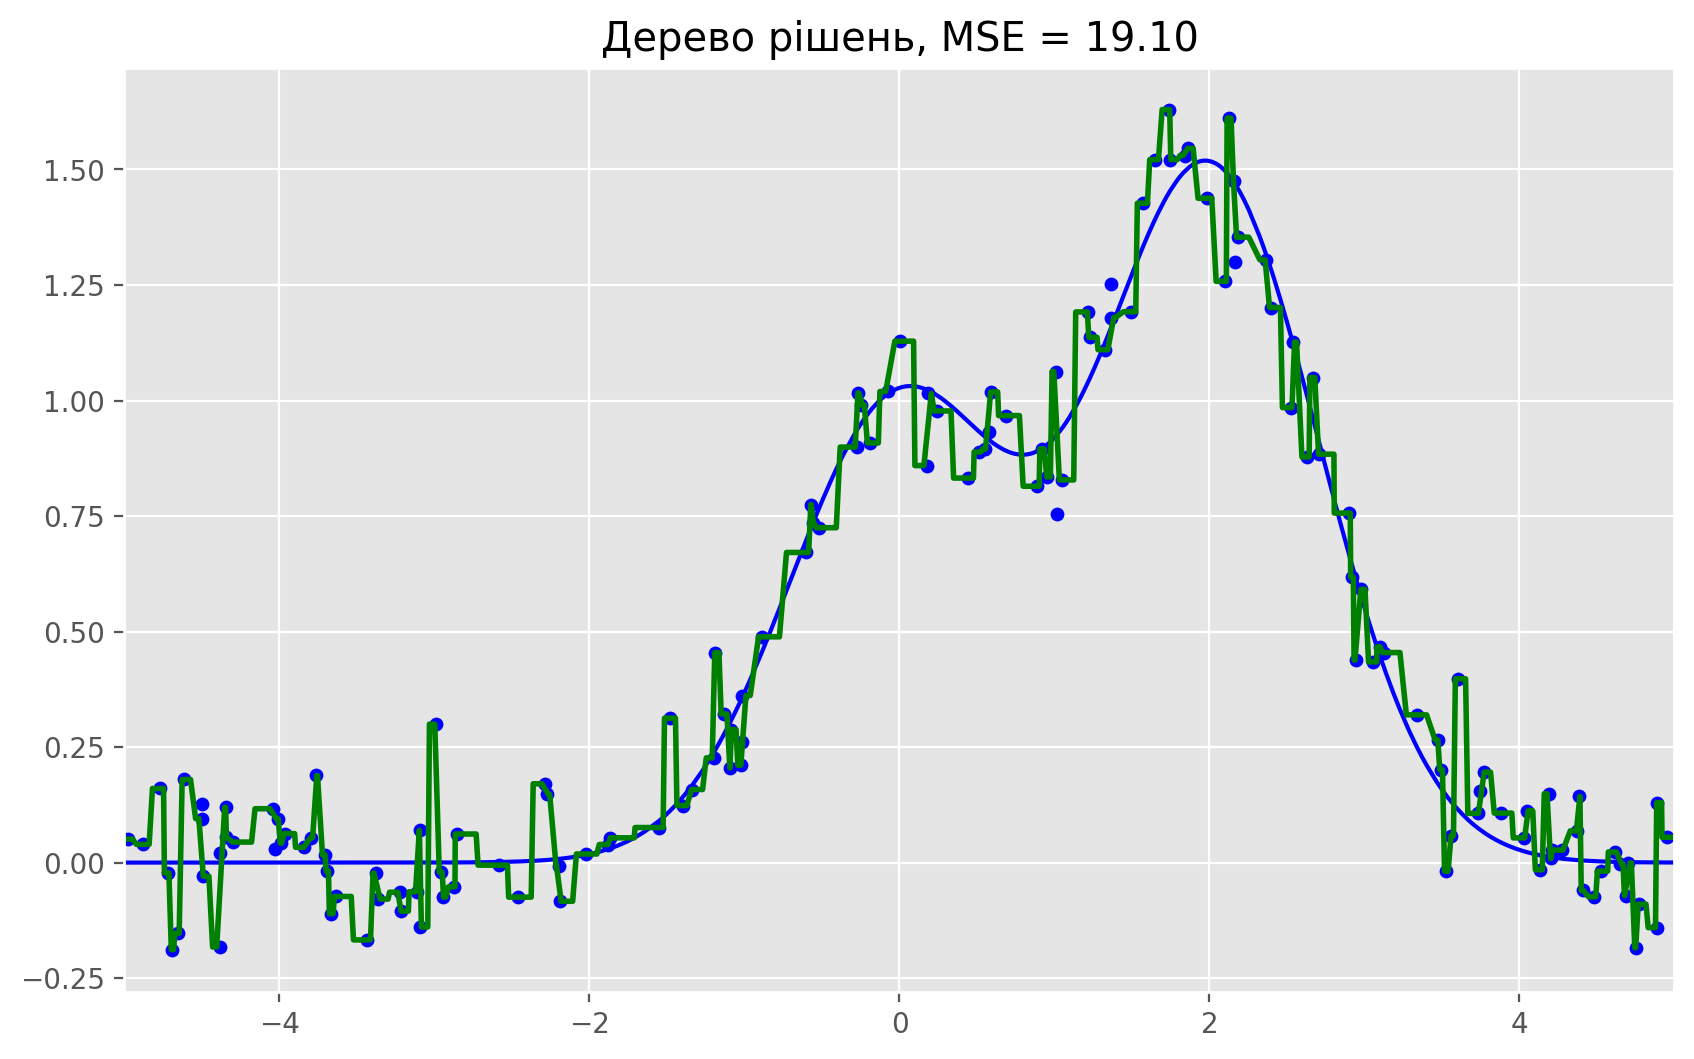

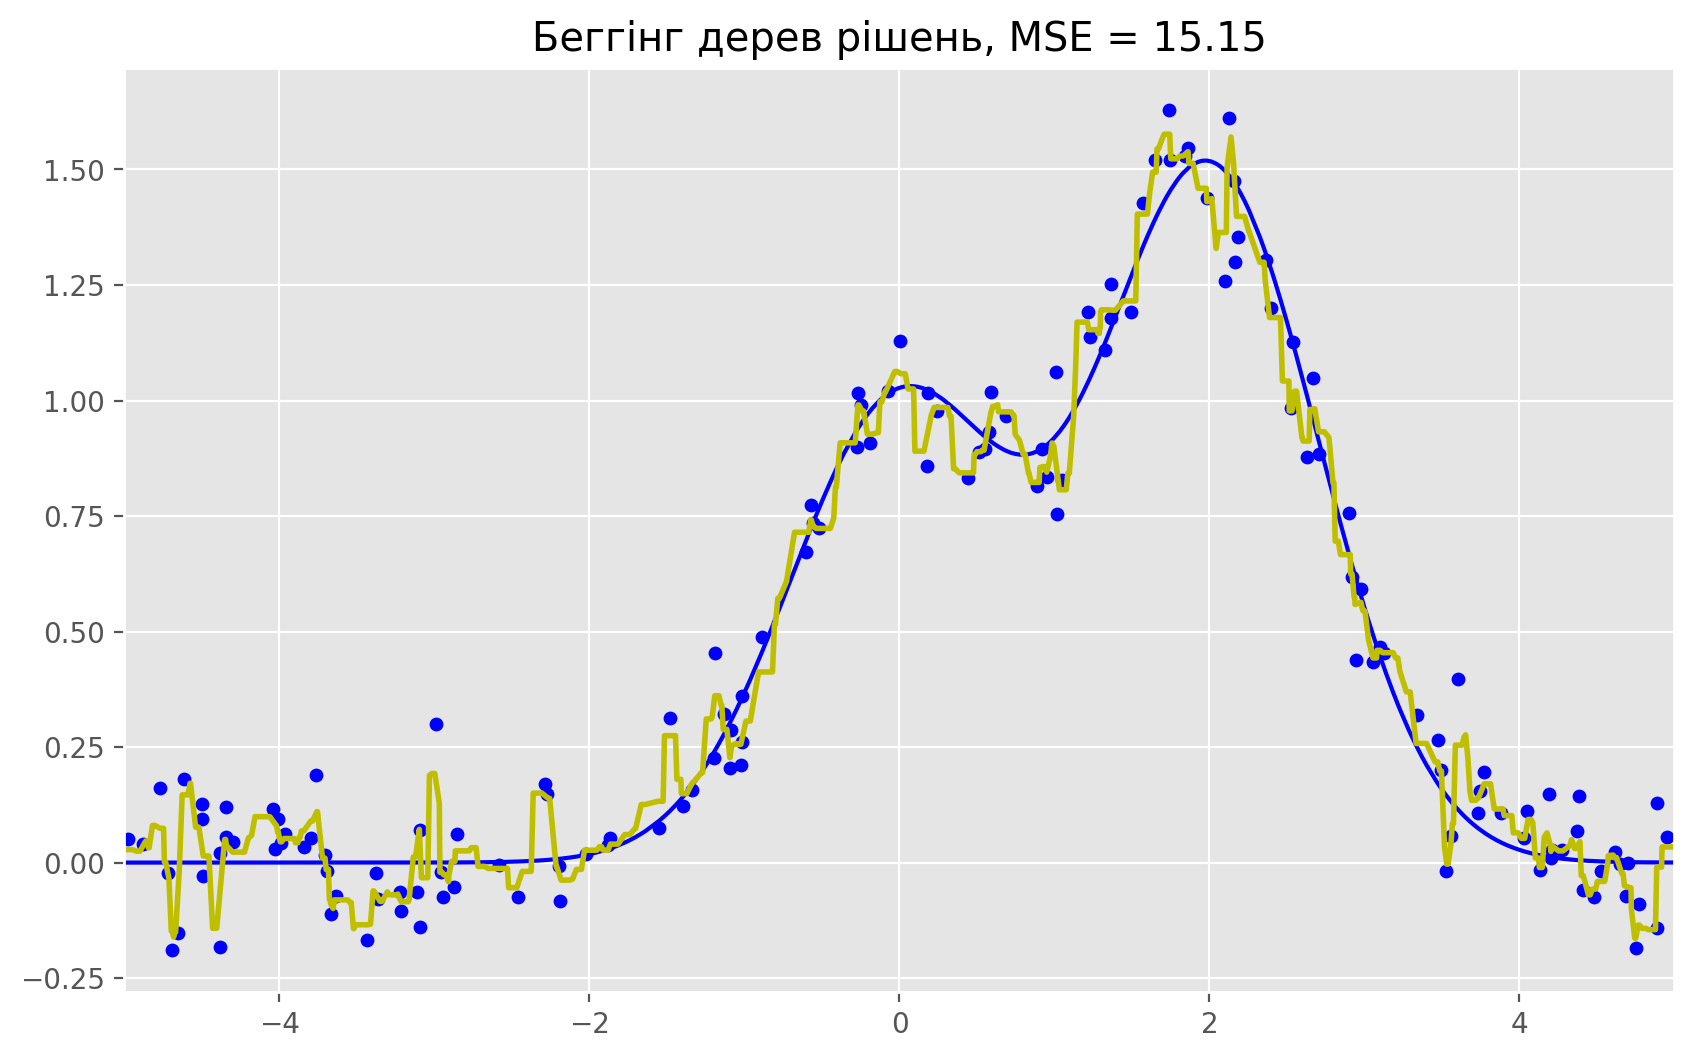

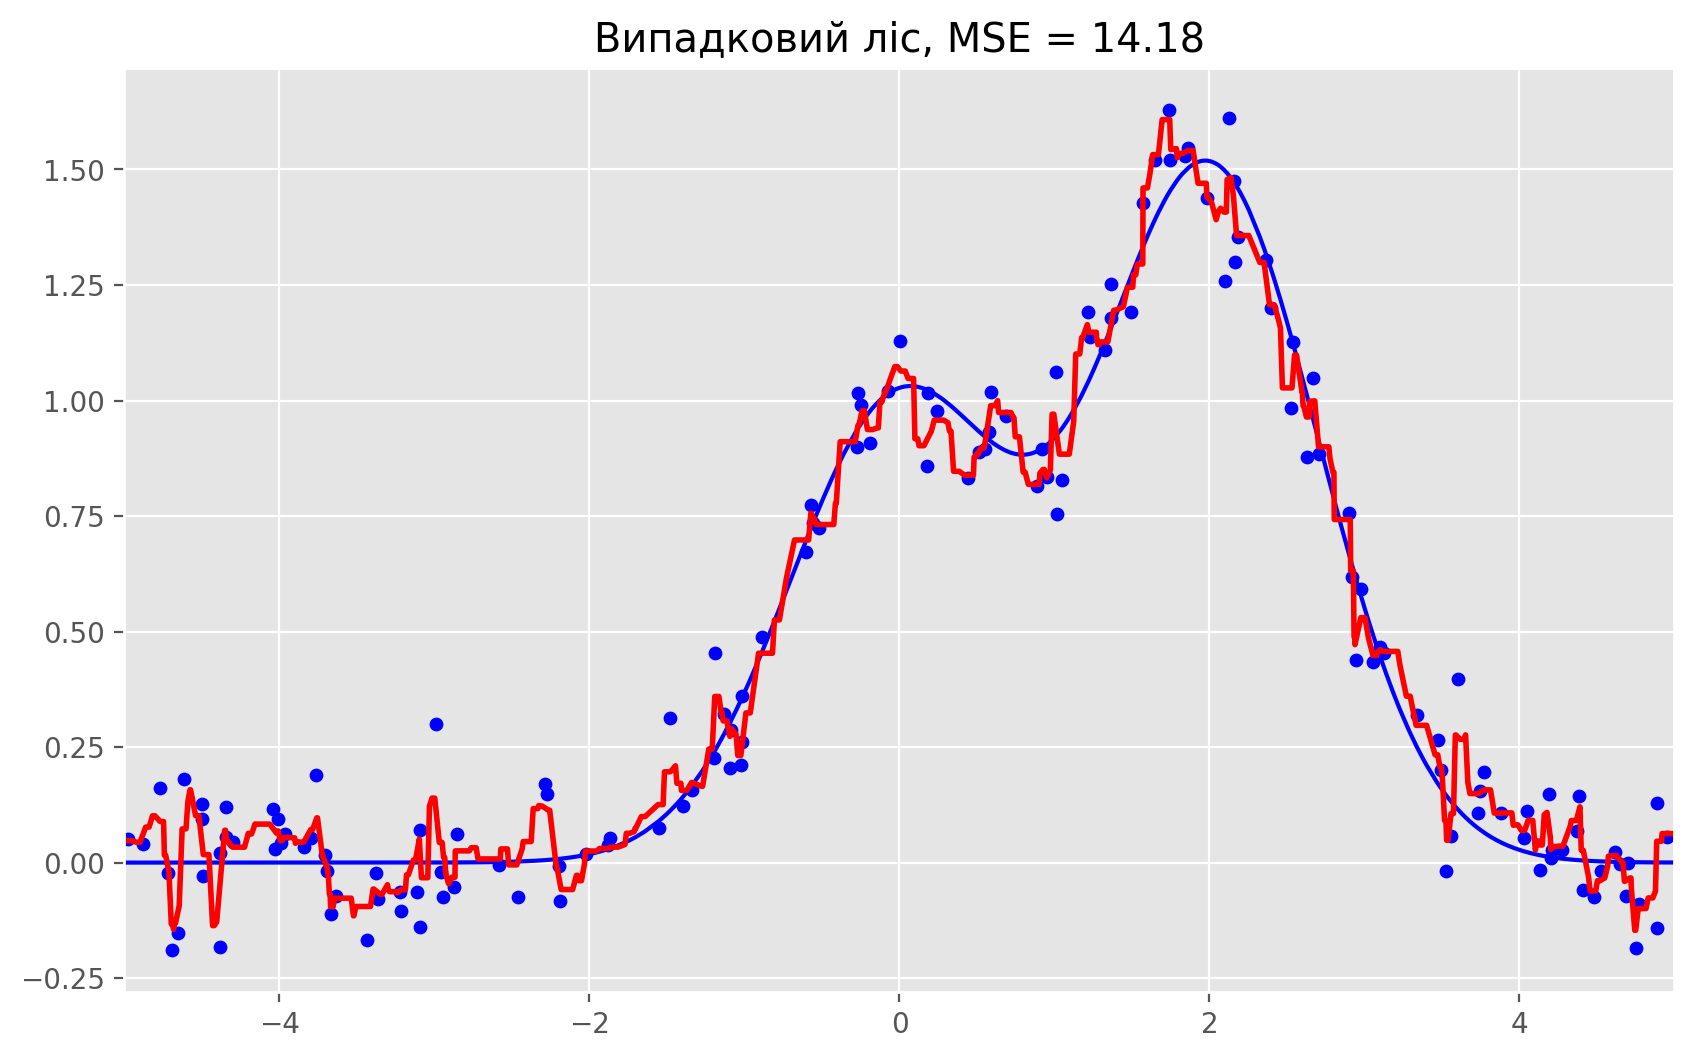

In [2]:
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

# One decision tree regressor
dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Дерево рішень, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))

# Bagging with a decision tree regressor
bdt = BaggingRegressor(DecisionTreeRegressor()).fit(X_train, y_train)
bdt_predict = bdt.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, bdt_predict, "y", lw=2)
plt.xlim([-5, 5])
plt.title("Беггінг дерев рішень, MSE = %.2f" % np.sum((y_test - bdt_predict) ** 2));

# Random Forest
rf = RandomForestRegressor(n_estimators=10).fit(X_train, y_train)
rf_predict = rf.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "r", lw=2)
plt.xlim([-5, 5])
plt.title("Випадковий ліс, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));

Як ми бачимо з графіків і значень помилки MSE, випадковий ліс з 10-ти дерев дає кращий результат, ніж одне дерево або беггінг з 10-ти дерев рішень. Основна відмінність випадкового лісу і беггінга на деревах рішень полягає в тому, що в випадковому лісі вибирається випадкова підмножина ознак, і найкраща ознака для розділення вузла визначається з підвибірки ознак, на відміну від беггінга, де всі ознаки розглядаються для розділення у вузлі.

Також можна побачити перевагу випадкового лісу і беггінга в задачах класифікації.

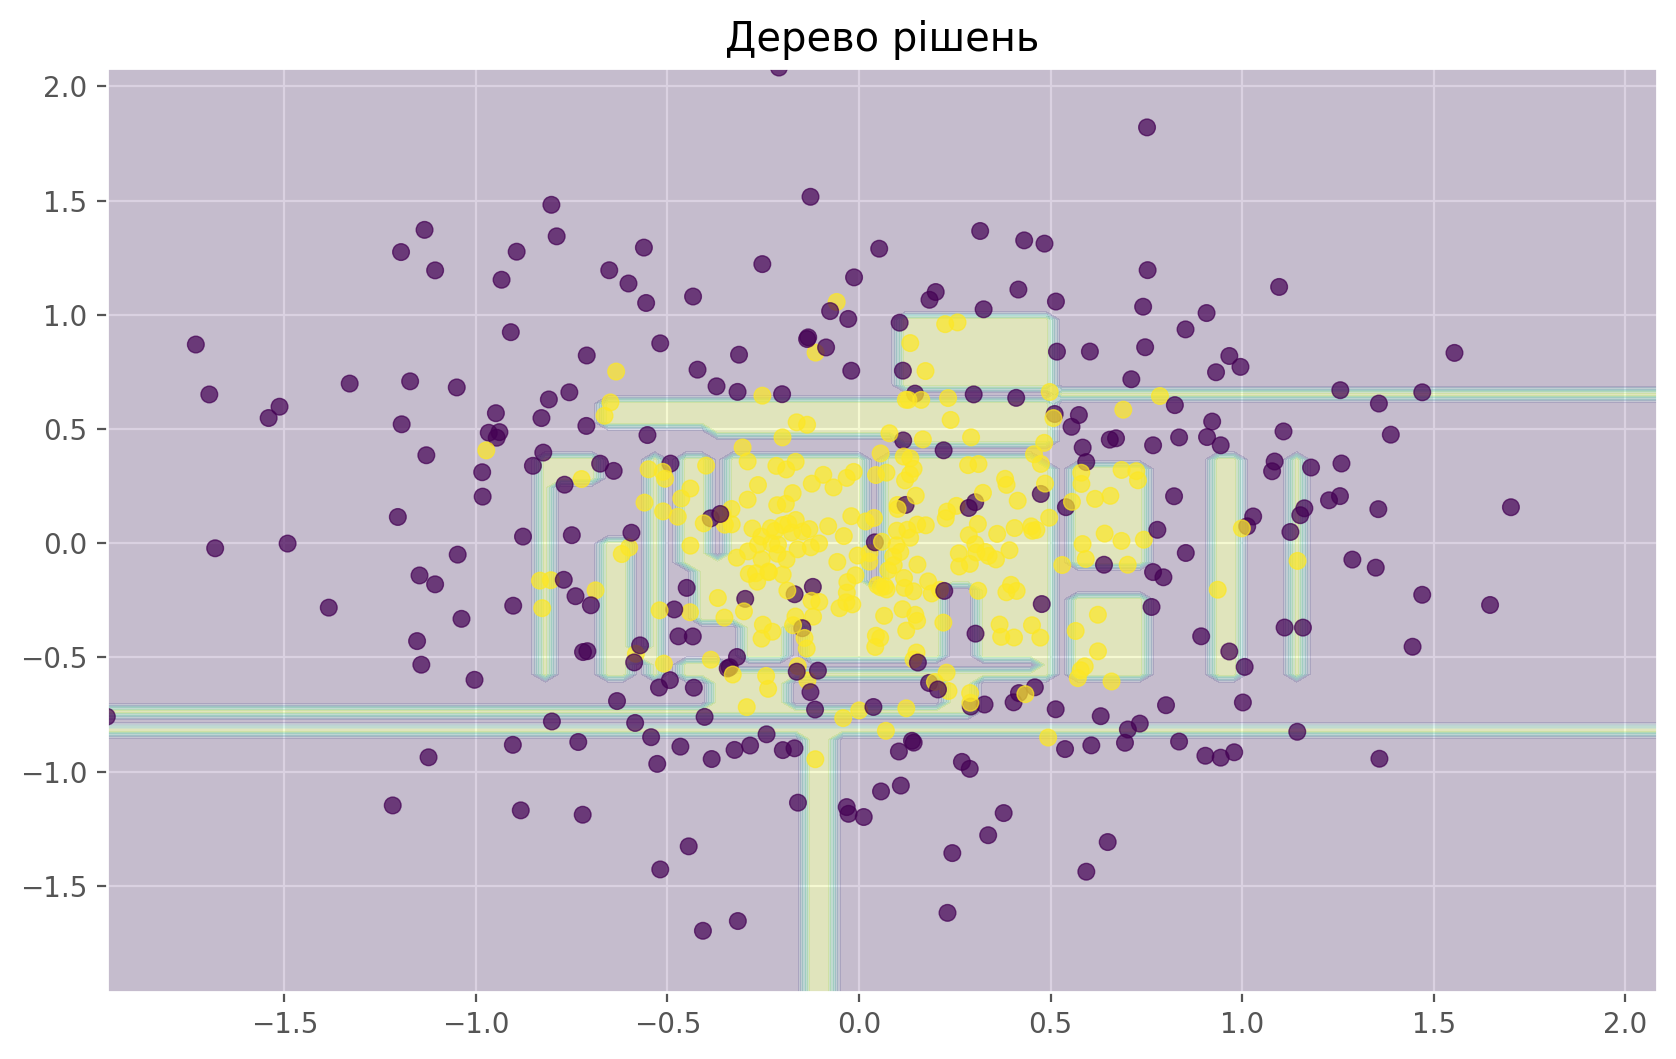

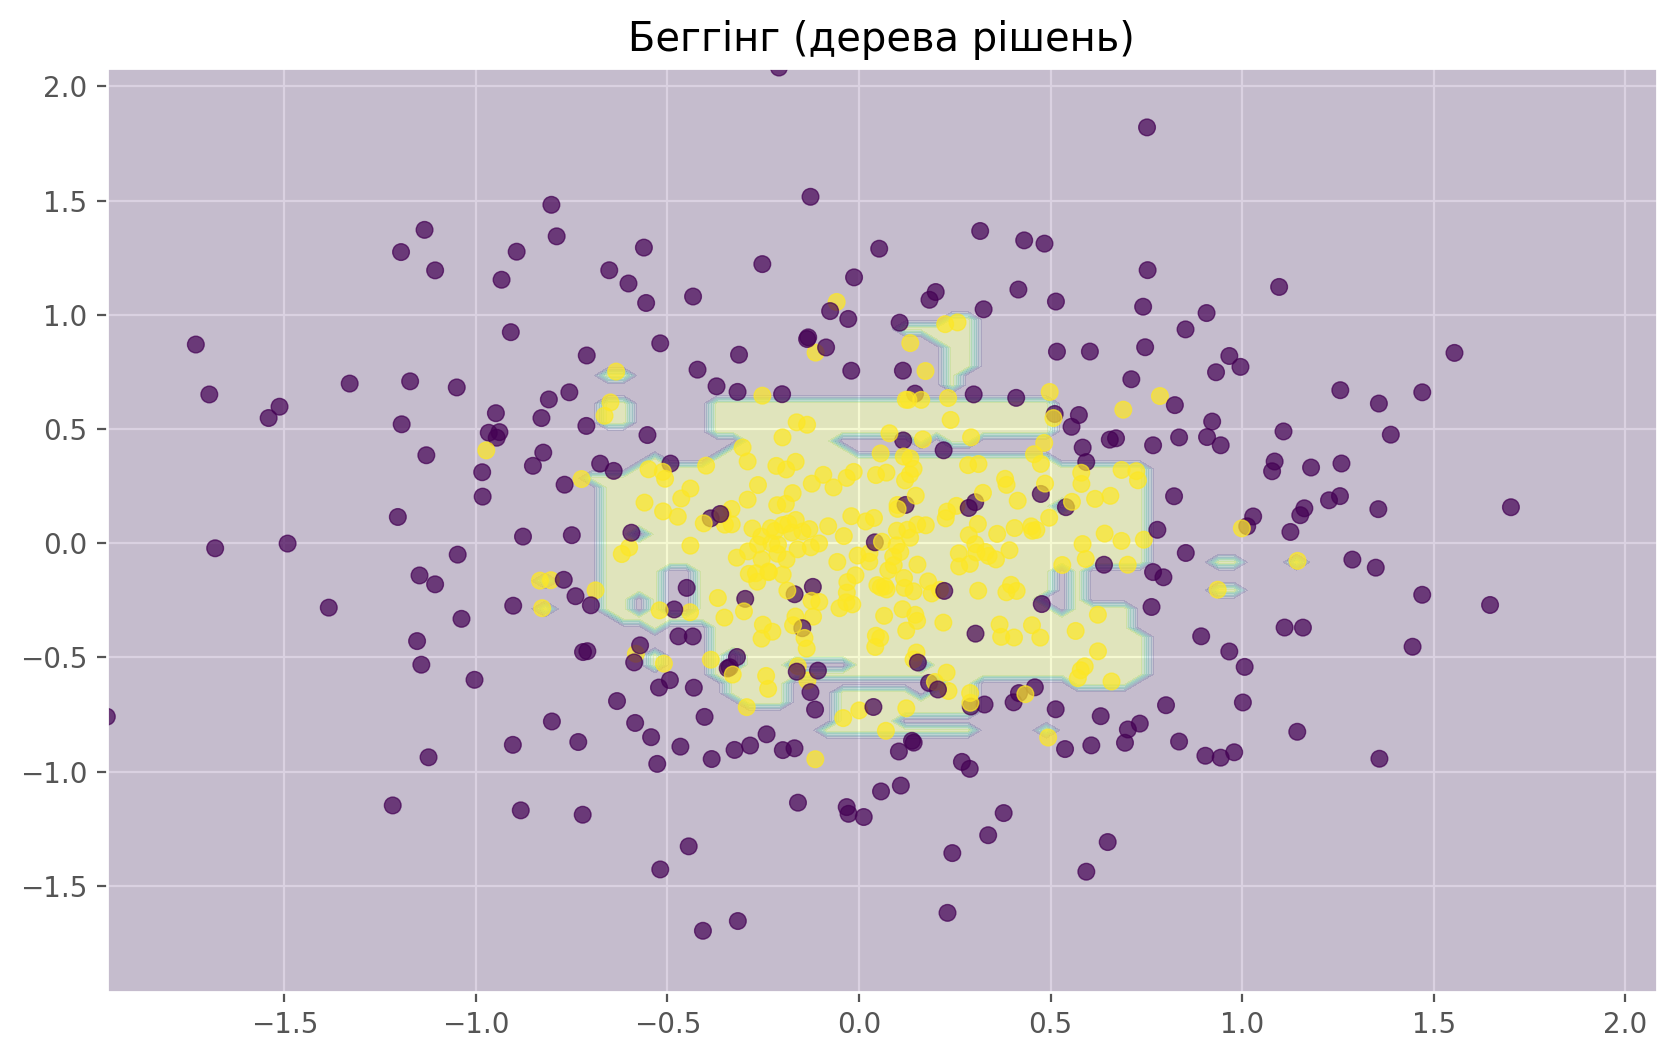

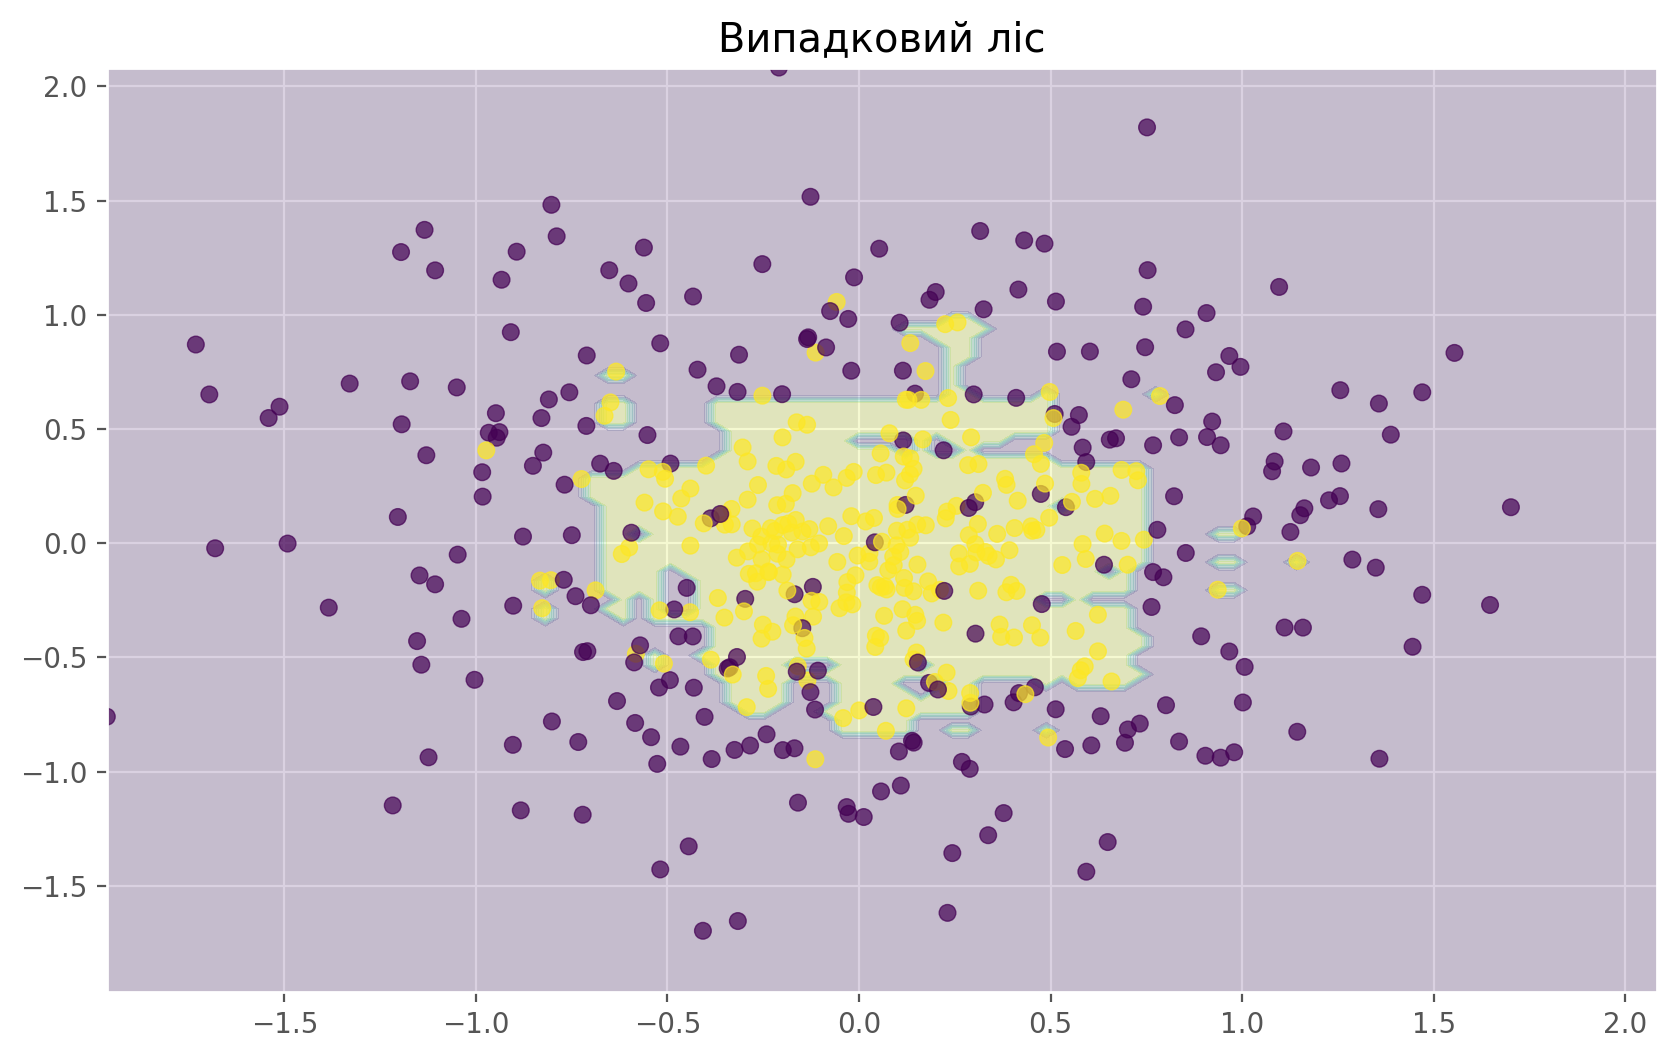

In [3]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = \
    train_test_split(X, y, test_size=0.2)

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Дерево рішень")
plt.show()

b_dtree = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators=300, random_state=42)
b_dtree.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = b_dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Беггінг (дерева рішень)")
plt.show()

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Випадковий ліс")
plt.show()

На рисунках вище видно, що розділяюча межа дерева рішень дуже «рвана» і на ній багато гострих кутів, що говорить про перенавчання і слабку здатність до узагальнення. У той час як у беггінга і випадкового лісу межа досить згладжена і практично немає ознак перенавчання.

### Параметри

Метод випадкового лісу реалізований в бібліотеці машинного навчання [scikit-learn](http://scikit-learn.org/stable/) двома класами `RandomForestClassifier` і `RandomForestRegressor`.

Повний список параметрів випадкового лісу для задачі регресії:

- `n_estimators` — кількість дерев в "лісі" (за замовчуванням — 10)
- `criterion` — функція, яка вимірює якість розбиття гілки дерева (за замовчуванням — "mse", так само можна вибрати "mae")
- `max_features` — кількість ознак, за якими шукається розбиття. Ви можете вказати конкретну кількість, або відсоток ознак, або вибрати з доступних значень: "auto" (всі ознаки), "sqrt", "log2". За замовчуванням стоїть "auto".
- `max_depth` — максимальна глибина дерева (за замовчуванням глибина не обмежена)
- `min_samples_split` — мінімальна кількість об'єктів, необхідна для розділення внутрішнього вузла. Можна задати числом або відсотком від загальної кількості об'єктів (за замовчуванням — 2)
- `min_samples_leaf` — мінімальна кількість об'єктів в листку. Можна задати числом або відсотком від загальної кількості об'єктів (за замовчуванням — 1)
- `min_weight_fraction_leaf` — мінімальна зважена частка від загальної суми ваг (всіх вхідних об'єктів) повинна бути в листку (за замовчуванням мають однакову вагу)
- `max_leaf_nodes` — максимальна кількість листків (за замовчуванням немає обмеження)
- `min_impurity_split` — поріг для зупинки нарощування дерева (за замовчуванням 1е-7)
- `bootstrap` — чи застосовувати бустреп для побудови дерева (за замовчуванням True)
- `oob_score` — чи використовувати out-of-bag об'єкти для оцінки R^2 (за замовчуванням False)
- `n_ jobs` — кількість ядер для побудови моделі і прогнозування (за замовчуванням 1, якщо поставити -1, то будуть використовуватися всі ядра)
- `random_state` — початкове значення для генерації випадкових чисел (за замовчуванням його немає, якщо хочете відтворювані результати, то потрібно вказати будь-яке число типу int
- `verbose` — вивід логів з побудови дерев (за замовчуванням 0)
- `warm_start` — використовує вже натреновану модель і додає дерева в ансамбль (за замовчуванням False)

Для задачі класифікації все майже те ж саме, ми наведемо лише ті параметри, якими `RandomForestClassifier` відрізняється від `RandomForestRegressor`

- `criterion` — оскільки у нас тепер задача класифікації, то за замовчуванням обраний критерій "gini" (можна вибрати "entropy")
- `class_weight` — вага кожного класу (за замовчуванням всі ваги рівні 1, але можна передати словник з вагами, або явно вказати "balanced", тоді ваги класів будуть обернено пропорційні їх вихідним частинам в генеральній сукупності; також можна вказати "balanced_subsample", тоді ваги на кожній підвибірці будуть змінюватися в залежності від розподілу класів на цій підвибірці.

Параметри, на які в першу чергу варто звернути увагу при побудові моделі:

- `n_estimators` — кількість дерев в "лісі";
- `criterion` — функція, яка вимірює якість розбиття у вузлі;
- `max_features` — кількість ознак, за якими шукається розбиття;
- `min_samples_leaf` — мінімальна кількість об'єктів в листку;
- `max_depth` — максимальна глибина дерева.

### Плюси і мінуси випадкового лісу

**Плюси**:
 - має високу точність передбачення, на більшості задач буде кращим за лінійні алгоритми
 
 - практично нечутливий до викидів в даних
 
 - нечутливий до масштабування (і взагалі до будь-яких монотонних перетворень) значень ознак, пов'язане з вибором випадкових підпросторів
 
 - не вимагає ретельного налаштування параметрів, добре працює «з коробки». За допомогою «тюнінгу» параметрів можна досягти приросту від 0.5 до 3% точності в залежності від задачі і даних
 
 - здатний ефективно обробляти дані з великою кількістю ознак і класів
 
 - однаково добре опрацьовує як неперервні, так і дискретні ознаки
 
 - рідко перенавчається, на практиці додавання дерев майже завжди тільки покращує композицію, але на валідації, після досягнення певної кількості дерев, крива навчання виходить на асимптоту
 
 - для випадкового лісу існують методи оцінювання значимості окремих ознак в моделі
 
 - добре працює з пропущеними даними; зберігає хорошу точність, якщо більша частина даних пропущена
 
 - передбачає можливість збалансувати вагу кожного класу на всій вибірці, або на підвибірці кожного дерева
 
**Мінуси**:
 - на відміну від одного дерева, результати випадкового лісу складніше інтерпретувати
 
 - алгоритм працює гірше багатьох лінійних методів, коли у вибірці дуже багато розріджених ознак (тексти, Bag of words)
 
 - випадковий ліс не вміє екстраполювати, на відміну від тієї ж лінійної регресії (але це можна вважати і плюсом, тому що не буде екстремальних значень в разі потрапляння викиду)
 
 - алгоритм схильний до перенавчання на деяких задачах, особливо на зашумлених даних
 
 - для даних, що включають категоріальні змінні з різною кількістю рівнів, випадкові ліси упереджені на користь ознак з більшою кількістю рівнів: коли у ознаки багато рівнів, дерево буде сильніше підлаштовуватися саме під ці ознаки, так як на них можна отримати більш високу точність
 
 - більший розмір отримуваних моделей, а отже потрібно більше пам'яті для зберігання моделі